In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab

In [2]:
#load all the analysis dataset
weight_df = pd.read_csv('Weight Measurement Data Analysis.csv')
food_df = pd.read_csv('Food Consumption Data Analysis.csv')

In [3]:
weight_df.head()

,Group,ID,Sex,Age (weeks),Weight (g) Day 0,Weight (g) Day 28
0,Control,1,Female,5,18,26
1,Control,2,Male,5,24,34
2,Control,3,Male,5,20,28
3,Control,4,Male,8,30,40
4,Control,5,Male,6,21,33


In [4]:
food_df.head()

,Treatment Group,Sex,Number of Animals in the Cage,Food Consumed Week 1 (g),Food Consumed Week 2 (g),Food Consumed Week 3 (g),Food Consumed Week 4 (g),"Food Consumed, Total (g)"
0,Control,Female,2,42,46,46,48,182
1,Control,Male,4,110,114,120,124,468
2,Treatment,Female,4,86,90,90,95,355
3,Treatment,Male,2,48,50,60,68,226


<h1 align = 'center'> Weight Measurement Data Analysis </h1>

## Descriptive Statistics

In [5]:
# Calculate statistics for control group
control_initial_stats = weight_df[weight_df['Group'] == 'Control']['Weight (g) Day 0'].describe()
control_final_stats = weight_df[weight_df['Group'] == 'Control']['Weight (g) Day 28'].describe()

# Calculate statistics for treatment group
treatment_initial_stats = weight_df[weight_df['Group'] == 'Treatment']['Weight (g) Day 0'].describe()
treatment_final_stats = weight_df[weight_df['Group'] == 'Treatment']['Weight (g) Day 28'].describe()

# Print results
print("Control Group Initial Stats:\n", control_initial_stats)
print("Control Group Final Stats:\n", control_final_stats)
print("Treatment Group Initial Stats:\n", treatment_initial_stats)
print("Treatment Group Final Stats:\n", treatment_final_stats)

Control Group Initial Stats:
 count     6.000000
mean     21.500000
std       4.969909
min      16.000000
25%      18.500000
50%      20.500000
75%      23.250000
max      30.000000
Name: Weight (g) Day 0, dtype: float64
Control Group Final Stats:
 count     6.000000
mean     31.000000
std       5.727128
min      25.000000
25%      26.500000
50%      30.500000
75%      33.750000
max      40.000000
Name: Weight (g) Day 28, dtype: float64
Treatment Group Initial Stats:
 count     6.000000
mean     21.000000
std       3.224903
min      17.000000
25%      18.500000
50%      21.000000
75%      23.500000
max      25.000000
Name: Weight (g) Day 0, dtype: float64
Treatment Group Final Stats:
 count     6.000000
mean     27.166667
std       2.483277
min      23.000000
25%      26.250000
50%      27.500000
75%      28.750000
max      30.000000
Name: Weight (g) Day 28, dtype: float64


## Percent weight change

In [6]:
weight_df['Weight Change (%)'] = ((weight_df['Weight (g) Day 28'] - weight_df['Weight (g) Day 0']) / weight_df['Weight (g) Day 0']) * 100

In [7]:
weight_df

,Group,ID,Sex,Age (weeks),Weight (g) Day 0,Weight (g) Day 28,Weight Change (%)
0,Control,1,Female,5,18,26,44.444444
1,Control,2,Male,5,24,34,41.666667
2,Control,3,Male,5,20,28,40.000000
3,Control,4,Male,8,30,40,33.333333
4,Control,5,Male,6,21,33,57.142857
5,Control,6,Female,4,16,25,56.250000
6,Treatment,7,Male,7,22,29,31.818182
7,Treatment,8,Female,5,17,26,52.941176
8,Treatment,9,Female,5,18,23,27.777778
9,Treatment,10,Male,5,25,30,20.000000


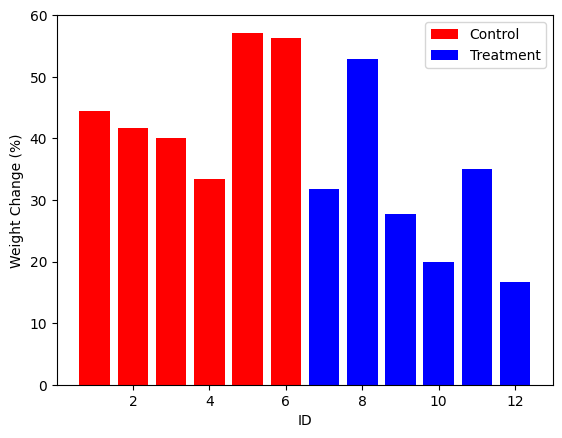

In [8]:
# Filter DataFrames
control_df = weight_df[weight_df['Group'] == 'Control']
treatment_df = weight_df[weight_df['Group'] == 'Treatment']

# Plot
plt.bar(control_df['ID'], control_df['Weight Change (%)'], color='red', label='Control')
plt.bar(treatment_df['ID'], treatment_df['Weight Change (%)'], color='blue', label='Treatment')

plt.xlabel('ID')
plt.ylabel('Weight Change (%)')
plt.legend()
plt.show()

## Group Comparison (Control vs. Treatment)

In [12]:
# Calculate mean weights for control group
control_mean_initial = weight_df[weight_df['Group'] == 'Control']['Weight (g) Day 0'].mean()
control_mean_final = weight_df[weight_df['Group'] == 'Control']['Weight (g) Day 28'].mean()

# Calculate mean weights for treatment group
treatment_mean_initial = weight_df[weight_df['Group'] == 'Treatment']['Weight (g) Day 0'].mean()
treatment_mean_final = weight_df[weight_df['Group'] == 'Treatment']['Weight (g) Day 28'].mean()

# Print results
print("Control Group Mean Weight at Day 0: ", control_mean_initial)
print("Control Group Mean Weight at Day 28: ", control_mean_final)
print("Treatment Group Mean Weight at Day 0: ", treatment_mean_initial)
print("Treatment Group Mean Weight at Day 28: ", treatment_mean_final)

# Compare the mean weights
control_weight_change = control_mean_final - control_mean_initial
treatment_weight_change = treatment_mean_final - treatment_mean_initial

print("Control Group Mean Weight Change: ", control_weight_change)
print("Treatment Group Mean Weight Change: ", treatment_weight_change)

Control Group Mean Weight at Day 0:  21.5
Control Group Mean Weight at Day 28:  31.0
Treatment Group Mean Weight at Day 0:  21.0
Treatment Group Mean Weight at Day 28:  27.166666666666668
Control Group Mean Weight Change:  9.5
Treatment Group Mean Weight Change:  6.166666666666668


## Age and Weight Correlation

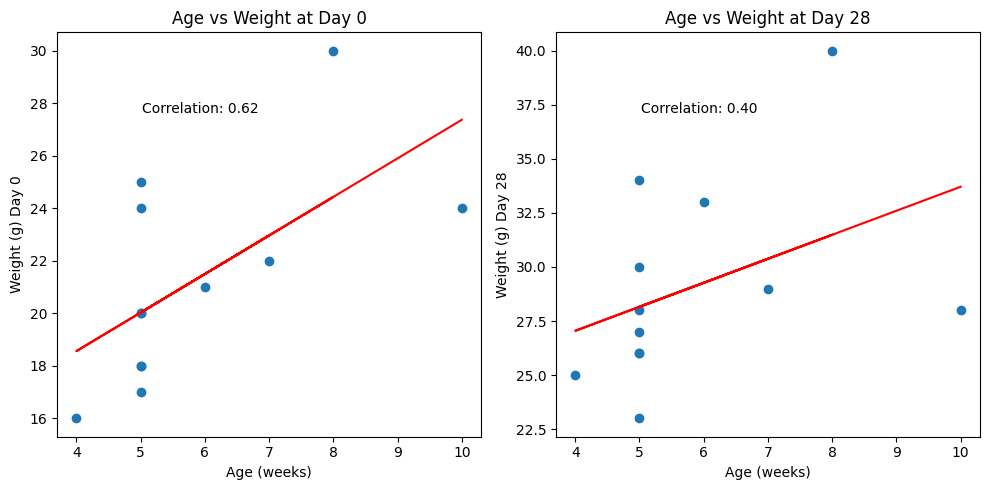

In [13]:
# Scatter plot for Age and Weight at Day 0
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(weight_df['Age (weeks)'], weight_df['Weight (g) Day 0'])
m, b = np.polyfit(weight_df['Age (weeks)'], weight_df['Weight (g) Day 0'], 1)
plt.plot(weight_df['Age (weeks)'], m*weight_df['Age (weeks)'] + b, color='red')
plt.title('Age vs Weight at Day 0')
plt.xlabel('Age (weeks)')
plt.ylabel('Weight (g) Day 0')
plt.text(0.2, 0.8, f'Correlation: {correlation_age_weight_day0:.2f}', transform=plt.gca().transAxes)

# Scatter plot for Age and Weight at Day 28
plt.subplot(1, 2, 2)
plt.scatter(weight_df['Age (weeks)'], weight_df['Weight (g) Day 28'])
m, b = np.polyfit(weight_df['Age (weeks)'], weight_df['Weight (g) Day 28'], 1)
plt.plot(weight_df['Age (weeks)'], m*weight_df['Age (weeks)'] + b, color='red')
plt.title('Age vs Weight at Day 28')
plt.xlabel('Age (weeks)')
plt.ylabel('Weight (g) Day 28')
plt.text(0.2, 0.8, f'Correlation: {correlation_age_weight_day28:.2f}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [11]:
# Calculate correlation between age and weight at Day 0
correlation_age_weight_day0 = weight_df['Age (weeks)'].corr(weight_df['Weight (g) Day 0'])

# Calculate correlation between age and weight at Day 28
correlation_age_weight_day28 = weight_df['Age (weeks)'].corr(weight_df['Weight (g) Day 28'])

# Print results
print("Correlation between Age and Weight at Day 0: ", correlation_age_weight_day0)
print("Correlation between Age and Weight at Day 28: ", correlation_age_weight_day28)

Correlation between Age and Weight at Day 0:  0.6224252677115368
Correlation between Age and Weight at Day 28:  0.4043028531832755


## Gender Based Analysis

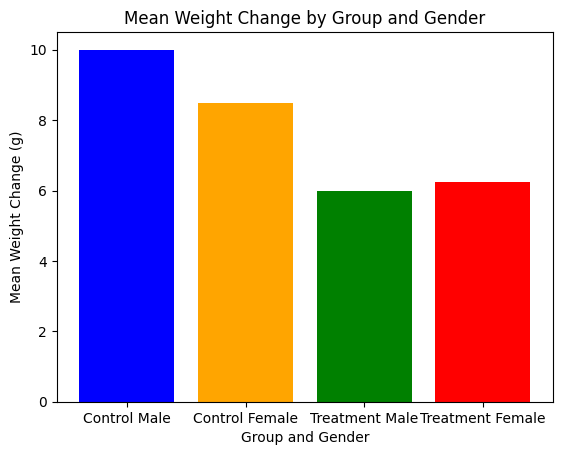

In [10]:
# Create lists for categories and mean weight changes
categories = ['Control Male', 'Control Female', 'Treatment Male', 'Treatment Female']
mean_changes = [control_male_mean_change, control_female_mean_change, treatment_male_mean_change, treatment_female_mean_change]

# Plot
plt.bar(categories, mean_changes, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Group and Gender')
plt.ylabel('Mean Weight Change (g)')
plt.title('Mean Weight Change by Group and Gender')
plt.show()

In [9]:
# Calculate weight change for each mouse
weight_df['Weight Change (g)'] = weight_df['Weight (g) Day 28'] - weight_df['Weight (g) Day 0']

# Calculate mean weight change for each gender within control group
control_male_mean_change = weight_df[(weight_df['Group'] == 'Control') & (weight_df['Sex'] == 'Male')]['Weight Change (g)'].mean()
control_female_mean_change = weight_df[(weight_df['Group'] == 'Control') & (weight_df['Sex'] == 'Female')]['Weight Change (g)'].mean()

# Calculate mean weight change for each gender within treatment group
treatment_male_mean_change = weight_df[(weight_df['Group'] == 'Treatment') & (weight_df['Sex'] == 'Male')]['Weight Change (g)'].mean()
treatment_female_mean_change = weight_df[(weight_df['Group'] == 'Treatment') & (weight_df['Sex'] == 'Female')]['Weight Change (g)'].mean()

# Print results
print("Control Group Male Mean Weight Change: ", control_male_mean_change)
print("Control Group Female Mean Weight Change: ", control_female_mean_change)
print("Treatment Group Male Mean Weight Change: ", treatment_male_mean_change)
print("Treatment Group Female Mean Weight Change: ", treatment_female_mean_change)

Control Group Male Mean Weight Change:  10.0
Control Group Female Mean Weight Change:  8.5
Treatment Group Male Mean Weight Change:  6.0
Treatment Group Female Mean Weight Change:  6.25


<h1 align = 'center'> Food Consumption Data Analysis </h1>

## Weekly consumption trends

In [15]:
# Calculate mean food consumption for each week within control group
control_mean_week1 = food_df[food_df['Treatment Group'] == 'Control']['Food Consumed Week 1 (g)'].mean()
control_mean_week2 = food_df[food_df['Treatment Group'] == 'Control']['Food Consumed Week 2 (g)'].mean()
control_mean_week3 = food_df[food_df['Treatment Group'] == 'Control']['Food Consumed Week 3 (g)'].mean()
control_mean_week4 = food_df[food_df['Treatment Group'] == 'Control']['Food Consumed Week 4 (g)'].mean()

# Calculate mean food consumption for each week within treatment group
treatment_mean_week1 = food_df[food_df['Treatment Group'] == 'Treatment']['Food Consumed Week 1 (g)'].mean()
treatment_mean_week2 = food_df[food_df['Treatment Group'] == 'Treatment']['Food Consumed Week 2 (g)'].mean()
treatment_mean_week3 = food_df[food_df['Treatment Group'] == 'Treatment']['Food Consumed Week 3 (g)'].mean()
treatment_mean_week4 = food_df[food_df['Treatment Group'] == 'Treatment']['Food Consumed Week 4 (g)'].mean()

# Print results
print("Control Group Mean Food Consumption Week 1: ", control_mean_week1)
print("Control Group Mean Food Consumption Week 2: ", control_mean_week2)
print("Control Group Mean Food Consumption Week 3: ", control_mean_week3)
print("Control Group Mean Food Consumption Week 4: ", control_mean_week4)
print("Treatment Group Mean Food Consumption Week 1: ", treatment_mean_week1)
print("Treatment Group Mean Food Consumption Week 2: ", treatment_mean_week2)
print("Treatment Group Mean Food Consumption Week 3: ", treatment_mean_week3)
print("Treatment Group Mean Food Consumption Week 4: ", treatment_mean_week4)

Control Group Mean Food Consumption Week 1:  76.0
Control Group Mean Food Consumption Week 2:  80.0
Control Group Mean Food Consumption Week 3:  83.0
Control Group Mean Food Consumption Week 4:  86.0
Treatment Group Mean Food Consumption Week 1:  67.0
Treatment Group Mean Food Consumption Week 2:  70.0
Treatment Group Mean Food Consumption Week 3:  75.0
Treatment Group Mean Food Consumption Week 4:  81.5


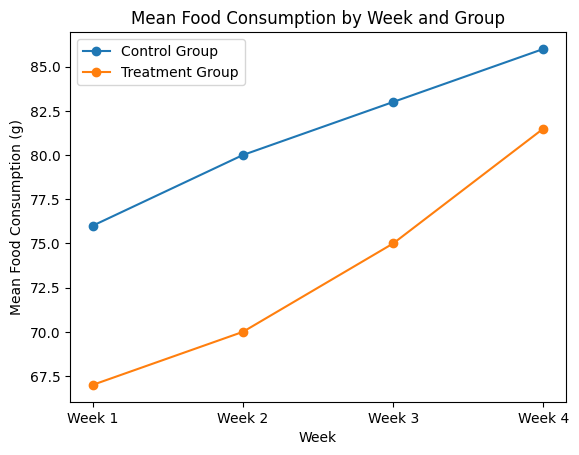

In [16]:
# Create lists for weeks and mean food consumptions
weeks = ['Week 1', 'Week 2', 'Week 3', 'Week 4']
control_means = [control_mean_week1, control_mean_week2, control_mean_week3, control_mean_week4]
treatment_means = [treatment_mean_week1, treatment_mean_week2, treatment_mean_week3, treatment_mean_week4]

# Plot
plt.plot(weeks, control_means, marker='o', label='Control Group')
plt.plot(weeks, treatment_means, marker='o', label='Treatment Group')
plt.xlabel('Week')
plt.ylabel('Mean Food Consumption (g)')
plt.title('Mean Food Consumption by Week and Group')
plt.legend()
plt.show()

## Total Food Consumption Comparison

In [16]:
# Calculate mean total food consumption for control group
control_mean_total = food_df[food_df['Treatment Group'] == 'Control']['Food Consumed, Total (g)'].mean()

# Calculate mean total food consumption for treatment group
treatment_mean_total = food_df[food_df['Treatment Group'] == 'Treatment']['Food Consumed, Total (g)'].mean()

# Print results
print("Control Group Mean Total Food Consumption: ", control_mean_total)
print("Treatment Group Mean Total Food Consumption: ", treatment_mean_total)

Control Group Mean Total Food Consumption:  325.0
Treatment Group Mean Total Food Consumption:  290.5


## Gender-based Consumption Analysis

In [17]:
# Calculate mean total food consumption for each gender within control group
control_male_mean_total = food_df[(food_df['Treatment Group'] == 'Control') & (food_df['Sex'] == 'Male')]['Food Consumed, Total (g)'].mean()
control_female_mean_total = food_df[(food_df['Treatment Group'] == 'Control') & (food_df['Sex'] == 'Female')]['Food Consumed, Total (g)'].mean()

# Calculate mean total food consumption for each gender within treatment group
treatment_male_mean_total = food_df[(food_df['Treatment Group'] == 'Treatment') & (food_df['Sex'] == 'Male')]['Food Consumed, Total (g)'].mean()
treatment_female_mean_total = food_df[(food_df['Treatment Group'] == 'Treatment') & (food_df['Sex'] == 'Female')]['Food Consumed, Total (g)'].mean()

# Print results
print("Control Group Male Mean Total Food Consumption: ", control_male_mean_total)
print("Control Group Female Mean Total Food Consumption: ", control_female_mean_total)
print("Treatment Group Male Mean Total Food Consumption: ", treatment_male_mean_total)
print("Treatment Group Female Mean Total Food Consumption: ", treatment_female_mean_total)

Control Group Male Mean Total Food Consumption:  468.0
Control Group Female Mean Total Food Consumption:  182.0
Treatment Group Male Mean Total Food Consumption:  226.0
Treatment Group Female Mean Total Food Consumption:  355.0


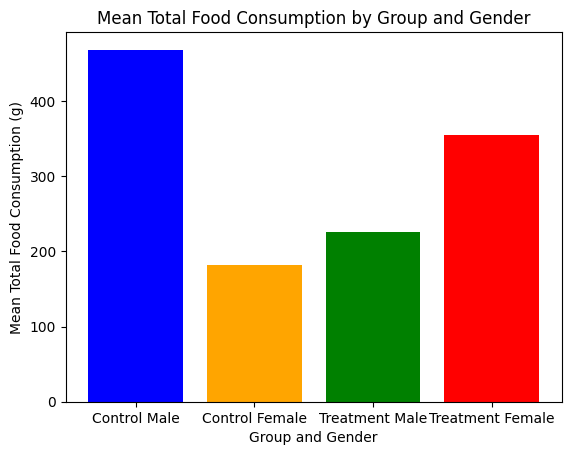

In [18]:
# Create lists for categories and mean total food consumptions
categories = ['Control Male', 'Control Female', 'Treatment Male', 'Treatment Female']
mean_totals = [control_male_mean_total, control_female_mean_total, treatment_male_mean_total, treatment_female_mean_total]

# Plot
plt.bar(categories, mean_totals, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Group and Gender')
plt.ylabel('Mean Total Food Consumption (g)')
plt.title('Mean Total Food Consumption by Group and Gender')
plt.show()

In [21]:
food_df.head()

,Treatment Group,Sex,Number of Animals in the Cage,Food Consumed Week 1 (g),Food Consumed Week 2 (g),Food Consumed Week 3 (g),Food Consumed Week 4 (g),"Food Consumed, Total (g)"
0,Control,Female,2,42,46,46,48,182
1,Control,Male,4,110,114,120,124,468
2,Treatment,Female,4,86,90,90,95,355
3,Treatment,Male,2,48,50,60,68,226


## Statistical Analysis of Food Consumption

In [20]:
from scipy import stats

# Separate the total food consumption data for the control and treatment groups
control_food = food_df[food_df['Treatment Group'] == 'Control']['Food Consumed, Total (g)']
treatment_food = food_df[food_df['Treatment Group'] == 'Treatment']['Food Consumed, Total (g)']

# Perform a t-test
t_stat, t_p_val = stats.ttest_ind(control_food, treatment_food)
print("T-test results: Statistic = ", t_stat, ", P-value = ", t_p_val)

# Perform a Mann-Whitney U test
u_stat, u_p_val = stats.mannwhitneyu(control_food, treatment_food)
print("Mann-Whitney U test results: Statistic = ", u_stat, ", P-value = ", u_p_val)

T-test results: Statistic =  0.2199226226518825 , P-value =  0.8463381240259811
Mann-Whitney U test results: Statistic =  2.0 , P-value =  1.0


In [21]:
# Create a DataFrame for the results
results_df = pd.DataFrame({
      'Test': ['T-test', 'Mann-Whitney U test'],
      'Statistic': [t_stat, u_stat],
      'P-value': [t_p_val, u_p_val]
})

# Print the DataFrame
print(results_df)

                  Test  Statistic   P-value
0               T-test   0.219923  0.846338
1  Mann-Whitney U test   2.000000  1.000000
